# Fake News Detection


In [54]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import os
from sklearn.model_selection import train_test_split
sns.set()

In [55]:
#import data
raw_data = pd.read_csv('news_articles.csv')
raw_data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


## Initial data clean and inspection before splitting

In [56]:
#info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [57]:
#text
raw_data[raw_data['text'].isnull()]

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2050,-NO AUTHOR-,2016-10-27T03:19:40.578+03:00,hillarys emails might not be missing after all,NaN,english,wnd.com,No Image URL,bias,Real,meteor space junk rocket mysterious flash hits...,NaN,1.0
2051,-NO AUTHOR-,2016-10-27T03:32:23.580+03:00,hillarys emails might not be missing after all,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/meteor_russia...,bias,Real,democrats really stuff ballot heres answer,NaN,1.0
2052,Leo Hohmann,2016-10-27T03:32:35.039+03:00,wikileaks bombshells on hillary you need to know,NaN,english,wnd.com,http://mobile.wnd.com/files/2013/07/ballot-box...,bias,Real,men cry rape irans top quran reader,NaN,1.0
2053,-NO AUTHOR-,2016-10-27T03:32:37.291+03:00,fascinated with sex,NaN,english,wnd.com,http://mobile.wnd.com/files/2016/10/Saeed_Toos...,bias,Real,democrats really stuff ballot heres answer,NaN,1.0
2054,-NO AUTHOR-,2016-10-27T04:01:58.682+03:00,meteor space junk rocket mysterious flash hits...,NaN,english,wnd.com,http://www.wnd.com/files/2013/07/ballot-box-vo...,bias,Real,men cry rape irans top quran reader,NaN,1.0
2055,Greg Corombos,2016-10-27T04:07:06.853+03:00,did democrats really stuff ballot heres their ...,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/Saeed_Toosi.jpg,bias,Real,meteor space junk rocket mysterious flash hits...,NaN,1.0
2056,Jay Baggett,2016-10-27T04:07:10.942+03:00,men cry rape by irans top quran reader,NaN,english,wnd.com,http://mobile.wnd.com/files/2016/10/meteor_rus...,bias,Real,bellwether trump kippas outselling hillary yar...,NaN,1.0
2057,Greg Corombos,2016-10-27T04:07:43.509+03:00,did democrats really stuff ballot heres their ...,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/3rd-debate-do...,bias,Real,grand slam fatherson film smash hit families,NaN,1.0
2058,Jay Baggett,2016-10-27T04:07:44.743+03:00,men cry rape by irans top quran reader,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/Hero1.jpg,bias,Real,judge warns dangers appointed judiciary,NaN,1.0
2059,-NO AUTHOR-,2016-10-27T04:19:46.902+03:00,meteor space junk rocket mysterious flash hits...,NaN,english,wnd.com,http://mobile.wnd.com/files/2012/03/wedding_ri...,bias,Real,grand slam fatherson film smash hit families,NaN,1.0


Drop the **2095** row as there is no URL

In [58]:
raw_data.drop(2095, axis = 0, inplace = True)

In [59]:
#fill columns with None and NaN
raw_data['author'].replace('-NO AUTHOR-', 'NaN', inplace  = True)
raw_data['title'].replace('No title', 'NaN' , inplace = True)
raw_data['text'].fillna(value = 'NaN' , inplace = True)

In [60]:
#convert real and fake to binary
real_dict = {'Real': 1, 'Fake': 0}
raw_data.label = [real_dict[item] for item in raw_data.label]

In [61]:
#languages
raw_data['language'].unique()

array(['english', 'ignore', 'german', 'french', 'spanish'], dtype=object)

In [62]:
#investigate ignore language
raw_data[raw_data['language'] == 'ignore']

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
848,davidduke.com,http://davidduke.com/wp-content/uploads/2014/0...,hate,httpmediaarchivesgsradionetddukemp dr duke fa...,ignore,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,1,billion dollars jewish lobby tip iceberg,views share remarkable articleand admissionapp...,1.0
850,Staff,2016-11-20T14:58:00.000+02:00,billion dollars for the jewish lobby just the ...,views share in a remarkable articleand admiss...,ignore,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,1,dont want break families encourage unaccompani...,share national bugle radio first step towards ...,1.0
855,Dr. Patrick Slattery,2016-11-22T10:47:49.603+02:00,national bugle radio the first step towards ov...,share \ntulsi gabbard for secretary of state a...,ignore,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,1,dr duke pastor dankof trumps america first for...,september new homes sales rise back level davi...,1.0


Ignore langauge is in English so will leave it as part of data

In [63]:
#dropping other languages
raw_data.drop(raw_data[raw_data['language'].isin(['german', 'french', 'spanish'])].index)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,1,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,1,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2090,NaN,2016-10-27T15:36:09.934+03:00,prof canoes reek of genocide white privilege,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/satan2_missil...,bias,1,check hillarythemed haunted house,NaN,1.0
2091,NaN,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,1,good samaritan wearing indian headdress disarm...,NaN,1.0
2092,NaN,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,1,skype sex scam fortune built shame,NaN,1.0
2093,NaN,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,0,cannabis aficionados develop thca crystalline ...,NaN,1.0


In [64]:
#has image to integer
raw_data = raw_data.astype({'hasImage':'Int32'})

In [65]:
#published time
raw_data.published[:5]

0    2016-10-26T21:41:00.000+03:00
1    2016-10-29T08:47:11.259+03:00
2    2016-10-31T01:41:49.479+02:00
3    2016-11-01T05:22:00.000+02:00
4    2016-11-01T21:56:00.000+02:00
Name: published, dtype: object

In [66]:
raw_data['published'] = pd.to_datetime(raw_data['published'], errors='coerce', utc = True)

In [67]:
raw_data.published

0             2016-10-26 18:41:00+00:00
1      2016-10-29 05:47:11.259000+00:00
2      2016-10-30 23:41:49.479000+00:00
3             2016-11-01 03:22:00+00:00
4             2016-11-01 19:56:00+00:00
                     ...               
2090   2016-10-27 12:36:09.934000+00:00
2091   2016-10-27 12:36:10.573000+00:00
2092   2016-10-27 12:36:10.671000+00:00
2093          2016-10-27 10:30:00+00:00
2094   2016-10-27 12:58:41.935000+00:00
Name: published, Length: 2095, dtype: datetime64[ns, UTC]

In [68]:
#converting datetimes to acutal dates

raw_data['year'] = raw_data['published'].dt.year.astype('Int32')
raw_data['day'] =  raw_data['published'].dt.day.astype('Int32')
raw_data['month'] = raw_data['published'].dt.month.astype('Int32')
raw_data['day_of_week'] = raw_data['published'].dt.day_of_week.astype('Int32')

In [69]:
days = {0: 'monday' , 1: 'tuedsday', 2: 'wednesday',
        3: 'thursday', 4: 'friday', 5: 'saturday', 6: 'sunday', raw_data['day_of_week'].unique()[-1]: np.NaN}

raw_data['day_of_week'] = [days[item] for item in raw_data.day_of_week]

In [70]:
#drop unnecessary columns
data = raw_data.drop(['title_without_stopwords', 'text_without_stopwords', 'language', 'type', 'published' ], axis = 1)

In [71]:
data.isnull().sum()

author          0
title           0
text            0
site_url        0
main_img_url    0
label           0
hasImage        0
year            2
day             2
month           2
day_of_week     2
dtype: int64

In [72]:
data.dropna(inplace = True)

In [73]:
data.head()

,author,title,text,site_url,main_img_url,label,hasImage,year,day,month,day_of_week
0,Barracuda Brigade,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,1,1,2016,26,10,wednesday
1,reasoning with facts,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,1,1,2016,29,10,saturday
2,Barracuda Brigade,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,1,1,2016,30,10,sunday
3,Fed Up,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,1,1,2016,1,11,tuedsday
4,Fed Up,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,1,1,2016,1,11,tuedsday


### NLP
#### BERT Wordpiece

In [74]:
#import hugging face tokenizers
from tokenizers import BertWordPieceTokenizer
from transformers import BertGenerationPreTrainedModel

In [75]:
#putting all text into one string
text_list = [text for text in data.text]

text_str = "".join(text_list)

#store string as txt file
with open('text_str.txt', 'w') as textfile:
    textfile.write(text_str)

In [76]:
#pre-tokenize
tokenizer = BertWordPieceTokenizer(
    clean_text = True,
    lowercase = True,
    handle_chinese_chars = False,
)

tokenizer.train(files = 'text_str.txt',
                vocab_size = 10000,
                min_frequency = 2,
                special_tokens = ['[PAS]', '[UNK]', '[SEP]', '[MASK]', '[CLS]'],
                wordpieces_prefix = '##')

In [77]:
tokenizer.save_model('tokenizer')

['tokenizer/vocab.txt']

In [78]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('tokenizer')

In [100]:
tokenizer.decode(tokenizer.encode('Hello Abayomi mate, how are you mate?'))

'[CLS] hello mate abayomi [UNK] how are you mate? [SEP]'

### Explaratory data analysis
Investigating if date and time has an impact on fake news posts

In [79]:
#finding fake news
fake_df  = data.where(data.label == 0)
real_df = data.where(data.label == 1)

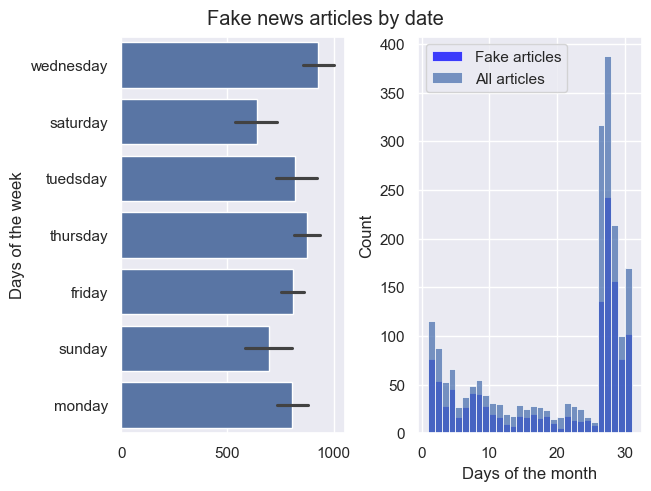

In [80]:
fig, ax = plt.subplots(1,2, layout = 'constrained')

sns.barplot(fake_df['day_of_week'], ax = ax[0])
sns.histplot(fake_df['day'], bins = 30, ax = ax[1], color = 'blue', label = 'Fake articles')
sns.histplot(data['day'], bins = 30, ax = ax[1], label = 'All articles')
ax[0].set_ylabel('Days of the week')
ax[1].set_xlabel('Days of the month')
fig.suptitle('Fake news articles by date')
ax[1].legend()


Investigating if whether the post featuring an image has any bearing on if the news is fake or not

/var/folders/d7/c45vs6n11xb04j29p_jkmypw0000gn/T/ipykernel_7919/846346042.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'Fake ({fake_images_pct:.1f}%)',f'Real ({real_images_pct:.1f}%)'])


Text(0.5, 1.0, 'Percentage of articles with images')

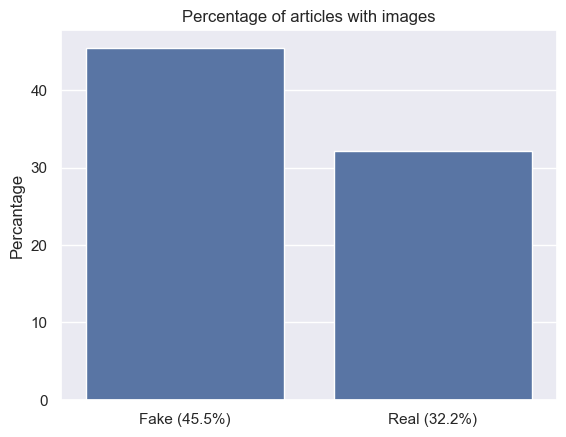

In [81]:
fake_images_pct = fake_df.hasImage.sum()/len(fake_df) * 100
real_images_pct = real_df.hasImage.sum()/len(data) * 100

fig, ax  = plt.subplots()
sns.barplot([fake_images_pct, real_images_pct])
ax.set_xticklabels([f'Fake ({fake_images_pct:.1f}%)',f'Real ({real_images_pct:.1f}%)'])
ax.set_ylabel('Percantage')
ax.set_title('Percentage of articles with images')

### Building BERT model
Importing PyTorch libraries

In [116]:
import torch
import torch.nn as nn
import torch.utils
from transformers import BertModel, BertTokenizer

In [117]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [118]:
MAX_LEN = 256
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
EPOCHS = 2
LEARNING_RATE = 1e-05

In [119]:
class CustomDataset(torch.utils.data.Dataset):

    def __init__(self, df, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.df = df
        self.text = df['text']
        self.targets = df['label']
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())    

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )    
        
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index])
        }

In [120]:
#split data into train and test data
train_size = 0.8
rand_state = 42
train_df_whole, test_df = train_test_split(data, train_size = train_size, random_state = rand_state)

In [121]:
#split training data into train and validation
train_df = train_df_whole.sample(frac=train_size, random_state = rand_state)
val_df = train_df_whole.drop(train_df.index)

In [122]:
train_dataset = CustomDataset(train_df, tokenizer, MAX_LEN)
valid_dataset = CustomDataset(val_df, tokenizer, MAX_LEN)

In [123]:
train_data_loader = torch.utils.data.DataLoader(train_dataset, 
    batch_size = TRAIN_BATCH_SIZE,
    shuffle = True,
    num_workers = 0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset, 
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers = 0
)

In [124]:
#building the BERT network
class BERTClass(nn.Module):
    
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 1)
    
    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids, 
            attention_mask = attn_mask, 
            token_type_ids = token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output)
        output_fin = self.linear(output_dropout)
        return output_fin

In [125]:
model = BERTClass()

In [126]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = torch.optim.Adam(params = model.parameters(), lr=LEARNING_RATE)    

In [127]:
val_targets=[]
val_outputs=[]

In [128]:
def train_model(n_epochs, training_loader, validation_loader, model, 
                optimizer):
   
  # initialize tracker for minimum validation loss
  valid_loss_min = np.Inf
   
 
  for epoch in range(1, n_epochs+1):
    train_loss = 0
    valid_loss = 0

    model.train()
    print('############# Epoch {}: Training Start   #############'.format(epoch))
    for batch_idx, data in enumerate(training_loader):
        #print('yyy epoch', batch_idx)
        ids = torch.tensor(data['input_ids']).dtype(torch.long)
        mask = torch.tensor(data['attention_mask']).dtype(torch.long)
        token_type_ids = torch.tensor(data['token_type_ids']).dtype(torch.long)
        targets = torch.tensor(data['targets']).dtype(torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        #if batch_idx%5000==0:
         #   print(f'Epoch: {epoch}, Training Loss:  {loss.item()}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print('before loss data in training', loss.item(), train_loss)
        train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))
        #print('after loss data in training', loss.item(), train_loss)
    
    print('############# Epoch {}: Training End     #############'.format(epoch))
    
    print('############# Epoch {}: Validation Start   #############'.format(epoch))
    ######################    
    # validate the model #
    ######################
 
  """"
    model.eval()
   
    with torch.inference_mode():
      for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(dtype = torch.long)
            mask = data['attention_mask'].to(dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.item() - valid_loss))
            val_targets.extend(targets.cpu().detach().numpy().tolist())
            val_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

      print('############# Epoch {}: Validation End     #############'.format(epoch))
      # calculate average losses
      #print('before cal avg train loss', train_loss)
      train_loss = train_loss/len(training_loader)
      valid_loss = valid_loss/len(validation_loader)
      # print training/validation statistics 
      print('Epoch: {} \tAvgerage Training Loss: {:.6f} \tAverage Validation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
   
        
      ## TODO: save the model if validation loss has decreased
      if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))

    print('############# Epoch {}  Done   #############\n'.format(epoch))
                 
                  """""
  return model
     

In [129]:
trained_model = train_model(EPOCHS, train_data_loader, val_data_loader, model, optimizer)    

############# Epoch 1: Training Start   #############


KeyError: 1090